# seaborn (Cleveland Dot Plot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.22.0
seaborn version = 0.8.1


## read miles per gallon dataset (mpg.csv)

In [3]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,20,27,r,compact
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
74,ford,expedition 2wd,4.6,1999,8,auto(l4),r,11,17,r,suv


In [4]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
189,toyota,camry solara,2.4,2008,4,auto(s5),front,22,31,r,compact,auto
118,hyundai,tiburon,2.0,2008,4,auto(l4),front,20,27,r,subcompact,auto
197,toyota,corolla,1.8,2008,4,auto(l4),front,26,35,r,compact,auto
5,audi,a4,2.8,1999,6,manual(m5),front,18,26,p,compact,manual
63,dodge,durango 4wd,5.9,1999,8,auto(l4),4-wheel,11,15,r,suv,auto


In [5]:
dg=df[(df['class']=='midsize') & 
      (df.gear == 'auto') & 
      (df.year == 2008)].sort_values(by='cty', ascending=False)
dg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
143,nissan,altima,2.5,2008,4,auto(av),front,23,31,r,midsize,auto
33,chevrolet,malibu,2.4,2008,4,auto(l4),front,22,30,r,midsize,auto
110,hyundai,sonata,2.4,2008,4,auto(l4),front,21,30,r,midsize,auto
182,toyota,camry,2.4,2008,4,auto(l5),front,21,31,r,midsize,auto
114,hyundai,sonata,3.3,2008,6,auto(l5),front,19,28,r,midsize,auto
146,nissan,altima,3.5,2008,6,auto(av),front,19,26,p,midsize,auto
149,nissan,maxima,3.5,2008,6,auto(av),front,19,25,p,midsize,auto
185,toyota,camry,3.5,2008,6,auto(s6),front,19,28,r,midsize,auto
229,volkswagen,passat,2.0,2008,4,auto(s6),front,19,28,p,midsize,auto
35,chevrolet,malibu,3.5,2008,6,auto(l4),front,18,29,r,midsize,auto


In [6]:
dg['car']=dg.apply(lambda v: f'{v.manufacturer} {v.model} {v.displ}L', axis=1)
dg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear,car
143,nissan,altima,2.5,2008,4,auto(av),front,23,31,r,midsize,auto,nissan altima 2.5L
33,chevrolet,malibu,2.4,2008,4,auto(l4),front,22,30,r,midsize,auto,chevrolet malibu 2.4L
110,hyundai,sonata,2.4,2008,4,auto(l4),front,21,30,r,midsize,auto,hyundai sonata 2.4L
182,toyota,camry,2.4,2008,4,auto(l5),front,21,31,r,midsize,auto,toyota camry 2.4L
114,hyundai,sonata,3.3,2008,6,auto(l5),front,19,28,r,midsize,auto,hyundai sonata 3.3L
146,nissan,altima,3.5,2008,6,auto(av),front,19,26,p,midsize,auto,nissan altima 3.5L
149,nissan,maxima,3.5,2008,6,auto(av),front,19,25,p,midsize,auto,nissan maxima 3.5L
185,toyota,camry,3.5,2008,6,auto(s6),front,19,28,r,midsize,auto,toyota camry 3.5L
229,volkswagen,passat,2.0,2008,4,auto(s6),front,19,28,p,midsize,auto,volkswagen passat 2.0L
35,chevrolet,malibu,3.5,2008,6,auto(l4),front,18,29,r,midsize,auto,chevrolet malibu 3.5L


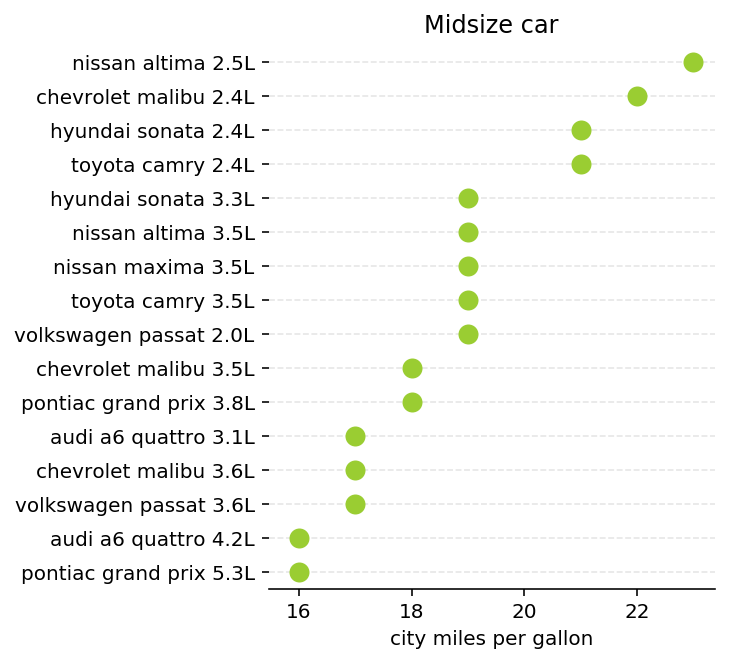

In [7]:
plt.figure(figsize=(4, 5))
ax = sns.stripplot(x='cty', y='car', data=dg, 
                  size=10, # marker size
    #               palette="Greens_r", 
                  color='yellowgreen', # https://matplotlib.org/examples/color/named_colors.html
                  edgecolor="white")
sns.despine(left=True)
ax.set_title('Midsize car')
ax.set_xlabel('city miles per gallon')
ax.set_ylabel('')
ax.yaxis.grid(True, color='.9', linestyle='--')

In [8]:
dg['efficiency']=pd.cut(dg.cty, bins=[0, 17, 20, 100], labels=['L', 'M', 'H'])
dg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear,car,efficiency
143,nissan,altima,2.5,2008,4,auto(av),front,23,31,r,midsize,auto,nissan altima 2.5L,H
33,chevrolet,malibu,2.4,2008,4,auto(l4),front,22,30,r,midsize,auto,chevrolet malibu 2.4L,H
110,hyundai,sonata,2.4,2008,4,auto(l4),front,21,30,r,midsize,auto,hyundai sonata 2.4L,H
182,toyota,camry,2.4,2008,4,auto(l5),front,21,31,r,midsize,auto,toyota camry 2.4L,H
114,hyundai,sonata,3.3,2008,6,auto(l5),front,19,28,r,midsize,auto,hyundai sonata 3.3L,M
146,nissan,altima,3.5,2008,6,auto(av),front,19,26,p,midsize,auto,nissan altima 3.5L,M
149,nissan,maxima,3.5,2008,6,auto(av),front,19,25,p,midsize,auto,nissan maxima 3.5L,M
185,toyota,camry,3.5,2008,6,auto(s6),front,19,28,r,midsize,auto,toyota camry 3.5L,M
229,volkswagen,passat,2.0,2008,4,auto(s6),front,19,28,p,midsize,auto,volkswagen passat 2.0L,M
35,chevrolet,malibu,3.5,2008,6,auto(l4),front,18,29,r,midsize,auto,chevrolet malibu 3.5L,M


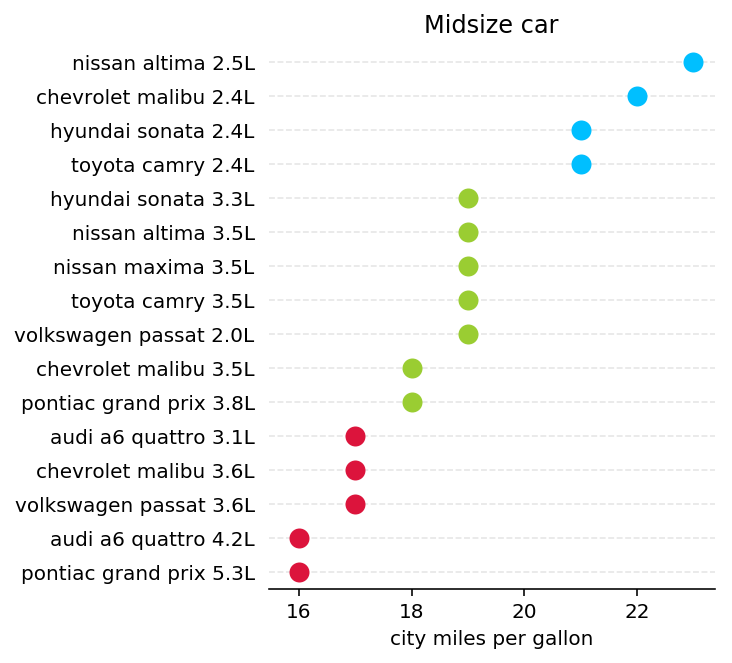

In [9]:
plt.figure(figsize=(4, 5))
ax = sns.stripplot(x='cty', y='car', data=dg, 
              size=10, # marker size
              hue='efficiency',
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
              edgecolor="white")
sns.despine(left=True)
ax.set_title('Midsize car')
ax.set_xlabel('city miles per gallon')
ax.set_ylabel('')
ax.yaxis.grid(True, color='.9', linestyle='--')
ax.get_legend().set_visible(False)
ax.yaxis.set_ticks_position('none') 

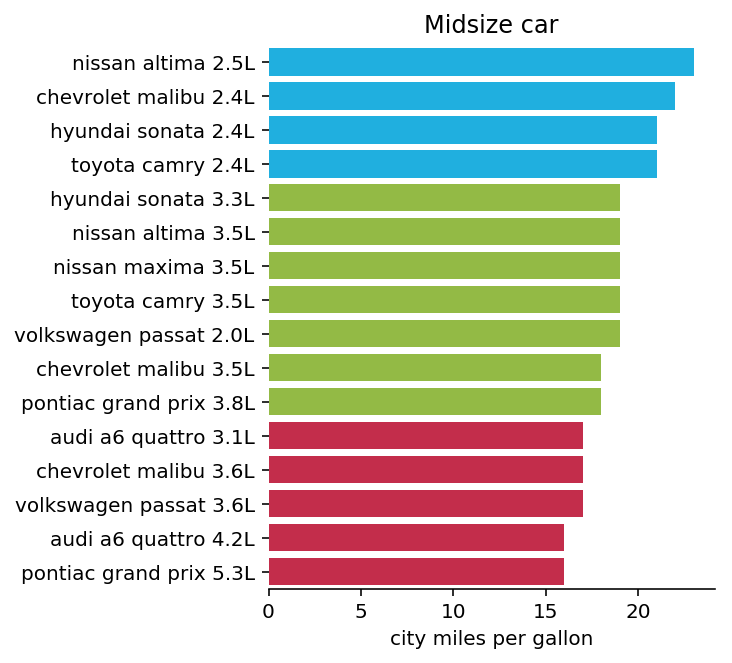

In [10]:
plt.figure(figsize=(4, 5))
ax = sns.barplot(x='cty', y='car', data=dg, 
              hue='efficiency',
              dodge=False,
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'}
              )
sns.despine()
sns.despine(left=True)
ax.set_title('Midsize car')
ax.set_xlabel('city miles per gallon')
ax.set_ylabel('')
ax.get_legend().set_visible(False)
# ax.yaxis.grid(True, color='.9', linestyle='--')

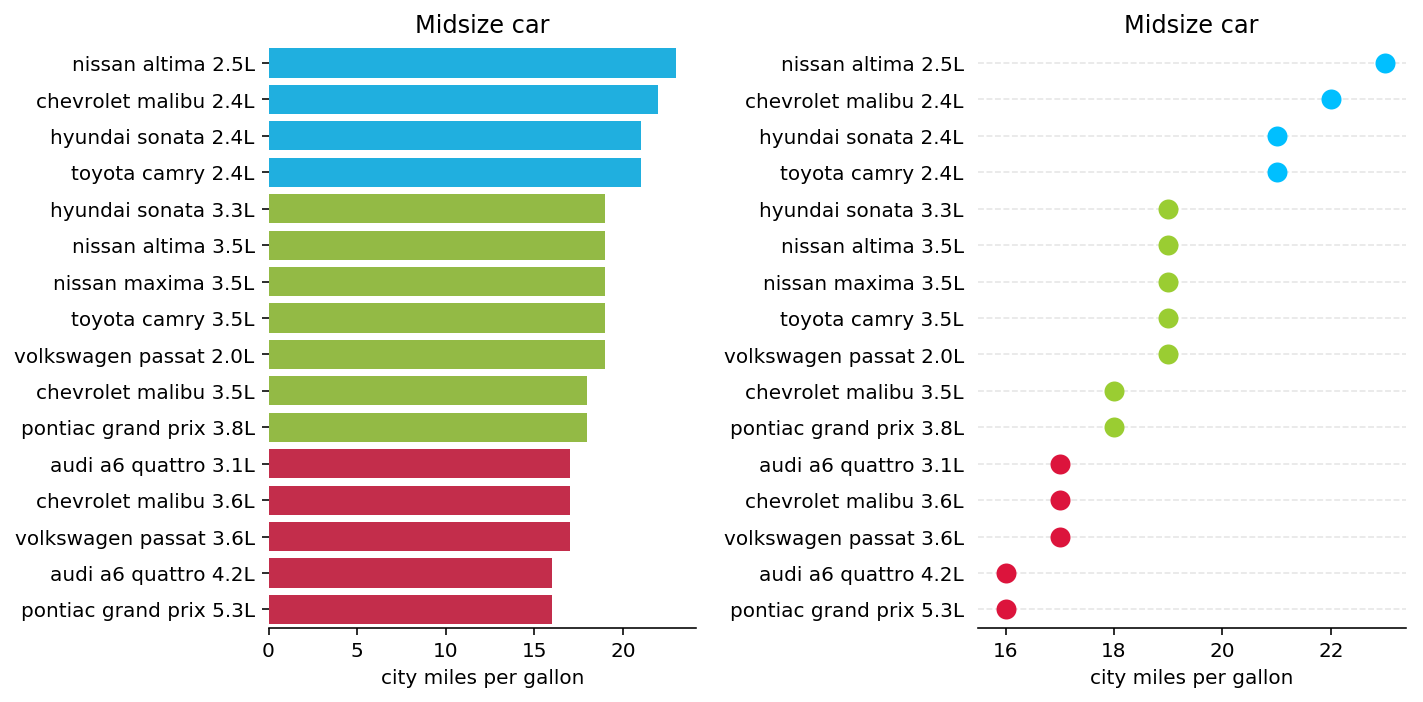

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='cty', y='car', data=dg, 
            hue='efficiency',
            dodge=False,
            palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
            color='yellowgreen',
            ax=ax[0])
ax[0].set_title('Midsize car')
ax[0].set_xlabel('city miles per gallon')
ax[0].set_ylabel('')
ax[0].get_legend().set_visible(False)
# ax[0].yaxis.set_ticks_position('none') 

sns.stripplot(x='cty', y='car', data=dg, 
              size=10,
              hue='efficiency',
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
              edgecolor="white",
              ax=ax[1])
sns.despine(left=True)
ax[1].set_title('Midsize car')
ax[1].set_xlabel('city miles per gallon')
ax[1].set_ylabel('')
ax[1].yaxis.grid(True, color='.9', linestyle='--')
# ax[1].get_yaxis().set_visible(False)
ax[1].get_legend().set_visible(False)
ax[1].yaxis.set_ticks_position('none') 
plt.tight_layout()

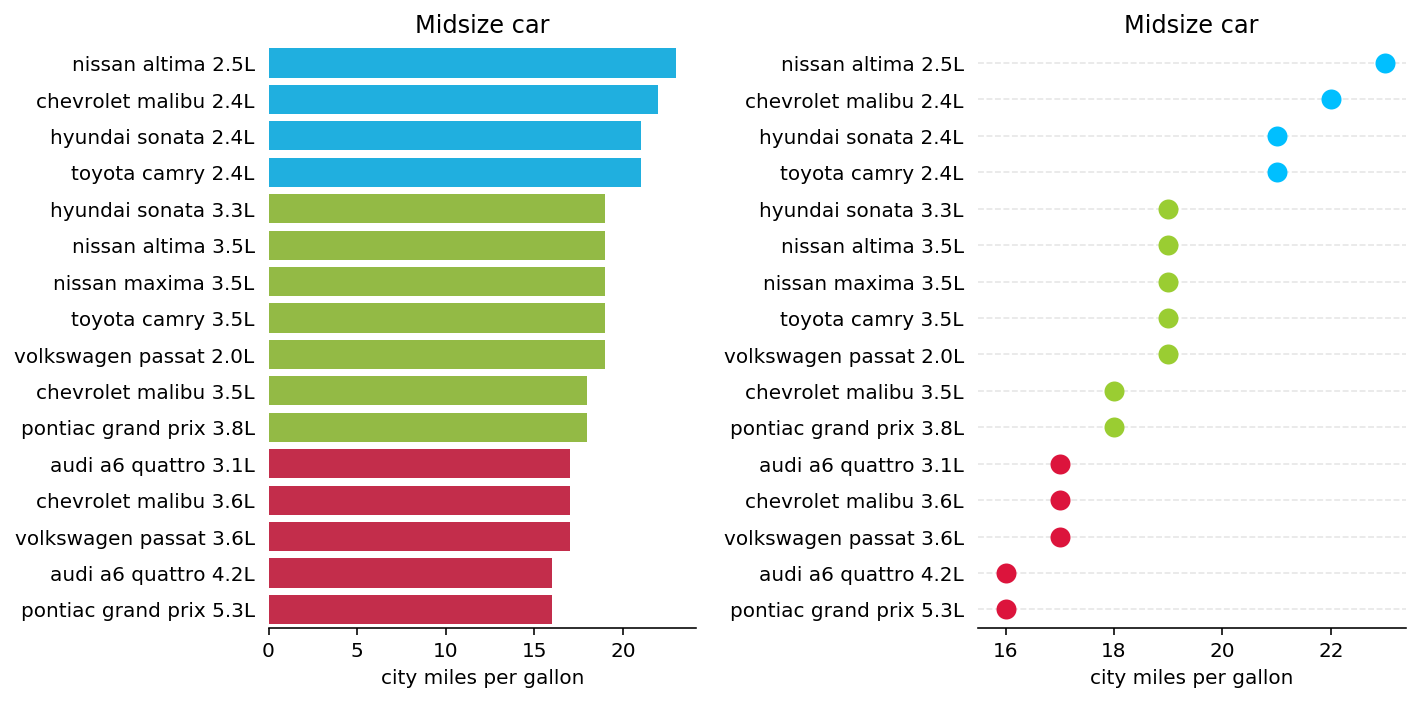

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='cty', y='car', data=dg, 
            hue='efficiency',
            dodge=False,
            palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
            color='yellowgreen',
            ax=ax[0])

sns.stripplot(x='cty', y='car', data=dg, 
              size=10,
              hue='efficiency',
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
              edgecolor="white",
              ax=ax[1])
sns.despine(left=True)
ax[1].yaxis.grid(True, color='.9', linestyle='--')

for a in ax:
    a.set_title('Midsize car')
    a.set_xlabel('city miles per gallon')
    a.set_ylabel('')
    a.get_legend().set_visible(False)
    a.yaxis.set_ticks_position('none') 
plt.tight_layout()